Importo las librerias necesarias, incluyendo las de preprocesamiento, entrenamiento y evaluación.


In [ ]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler
)

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf , GradientBoostingClassifier as gb
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AUTO 2/PROYECTO MODELOS DL/EMG_Features.csv")
df

,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000118,0.000084,1.383804e-08,16,0.016724,44.779334,40.0,2.248886,0.000406,0.000295,1.648139e-07,11,0.058963,73.001348,80.0,2.294145,1.0
12414,0.000072,0.000054,5.112447e-09,19,0.010888,49.540454,30.0,2.211320,0.000290,0.000194,8.184051e-08,11,0.038831,47.272126,50.0,1.968698,1.0
12415,0.000087,0.000069,7.562360e-09,18,0.013798,85.696916,90.0,2.325793,0.000196,0.000146,3.807773e-08,14,0.029117,75.684680,80.0,2.435941,1.0
12416,0.000092,0.000078,8.525652e-09,14,0.015602,80.356192,80.0,2.536613,0.000234,0.000181,5.437050e-08,16,0.036139,52.743481,40.0,2.276363,1.0


Luego de realizar el correspondiente EDA y concluir que es util realizar un PCA, continuamos el proceso y el siguiente paso es separar nuestros datos y crear un pipepline, en el cual hagamos una normalización de los datos y apliquemos el PCA. El pipeline solo tendrá estos pasos ya que la idea es que se aplique a varios modelos.

**DIVISIÓN DE LOS DATOS**

In [ ]:
X = df.drop(columns=['Target'])
y = df['Target']



print(y)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12413    1.0
12414    1.0
12415    1.0
12416    1.0
12417    1.0
Name: Target, Length: 12418, dtype: float64


In [ ]:
#Hago una división de datos 70-15-15
X_train, X_treinta, y_train, y_treinta = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
    )
X_val, X_test, y_val, y_test = train_test_split(
    X_treinta, y_treinta, test_size=0.50, random_state=42, stratify=y_treinta
)

In [ ]:
print("Tamaños:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tamaños:
Train: (8692, 16) (8692,)
Val: (1863, 16) (1863,)
Test: (1863, 16) (1863,)


**PIPELINE DE PROCESAMIENTO **



In [ ]:


# Pipeline de escalado y el PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))   #Para que nos de el 95% de varianza
])

# Ajustar EL PIPELINE con train, se hace solo con este porque como sabemos se puede sesgar
pipeline_pca.fit(X_train)

# Transformar cada conjunto
X_train_pca = pipeline_pca.transform(X_train)
X_val_pca   = pipeline_pca.transform(X_val)
X_test_pca  = pipeline_pca.transform(X_test)

# Varianza explicada
pca = pipeline_pca.named_steps['pca']
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza explicada acumulada:",
      pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.37144445 0.20124968 0.14981568 0.08190279 0.05673402 0.04973711
 0.03248761 0.02660736]

Varianza explicada acumulada: 0.9699787024598475


**ENTRENAMIENTO DE MODELO 1**
Para experimentar un poco con la arquitectura de las redes neuronales profundas, probaaré diferentes cantidades de neuronas en cada capa y así ver cual dió mejor rendimiento.

In [ ]:
import random
# creo una funcion para poder que la arquitectura se pueda repetir
#fijar semillas para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

input_dim = X_train_pca.shape[1]

def build_dnn(units1, units2, input_dim, l2_reg=1e-3, dropout_rate=0.3):
    model = Sequential([
        Dense(units1, activation='relu',
              input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(units2, activation='relu',
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model


In [ ]:
# Configuraciones de arquitecturas a probar
arquitecturas = [
    (32, 16),
    (64, 32),
    (128, 64)
]

resultados = {}
historias = {}

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

for units1, units2 in arquitecturas:
    nombre = f"{units1}-{units2}-1"
    print(f"\n Entrenando modelo {nombre}")

    model = build_dnn(units1, units2, input_dim)

    history = model.fit(
        X_train_pca, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_val_pca, y_val),
        callbacks=[early_stop],
        verbose=1 # para poder ver las epocas como con las barras y las metricas
    )

    # Evaluar en validación
    val_loss, val_acc, val_auc = model.evaluate(X_val_pca, y_val, verbose=0)

    resultados[nombre] = {
        "val_loss": val_loss,
        "val_acc": val_acc,
        "val_auc": val_auc,
        "model": model
    }
    historias[nombre] = history

    print(f" {nombre} -> val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}, val_auc: {val_auc:.4f}")



 Entrenando modelo 32-16-1
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7259 - auc: 0.8034 - loss: 0.5489 - val_accuracy: 0.8894 - val_auc: 0.9560 - val_loss: 0.3123
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - auc: 0.9486 - loss: 0.3206 - val_accuracy: 0.9082 - val_auc: 0.9655 - val_loss: 0.2711
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9087 - auc: 0.9539 - loss: 0.2928 - val_accuracy: 0.9157 - val_auc: 0.9696 - val_loss: 0.2525
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9117 - auc: 0.9593 - loss: 0.2737 - val_accuracy: 0.9184 - val_auc: 0.9723 - val_loss: 0.2414
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9154 - auc: 0.9622 - loss: 0.2597 - val_accuracy: 0.9195 - val_auc: 0.9741 - val_loss: 0.2307
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9197 - auc: 0.9664 - loss: 0.2461 - val_accuracy: 0.9275 - val_auc: 0.9757 - val_loss: 0.2220
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7895 - auc: 0.8635 - loss: 0.4909 - val_accuracy: 0.9050 - val_auc: 0.9640 - val_loss: 0.2956
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9080 - auc: 0.9582 - loss: 0.2992 - val_accuracy: 0.9173 - val_auc: 0.9718 - val_loss: 0.2545
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - auc: 0.9640 - loss: 0.2648 - val_accuracy: 0.9275 - val_auc: 0.9754 - val_loss: 0.2332
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9236 - auc: 0.9674 - loss: 0.2474 - val_accuracy: 0.9313 - val_auc: 0.9777 - val_loss: 0.2200
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9219 - auc: 0.9690 - loss: 0.2393 - val_accuracy: 0.9351 - val_auc: 0.9790 - val_loss: 0.2123
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - auc: 0.9718 - loss: 0.2249 - val_accuracy: 0.9340 - val_auc: 0.9801 - val_loss: 0.2058
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8321 - auc: 0.9195 - loss: 0.4600 - val_accuracy: 0.9179 - val_auc: 0.9692 - val_loss: 0.2923
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9138 - auc: 0.9643 - loss: 0.2874 - val_accuracy: 0.9281 - val_auc: 0.9755 - val_loss: 0.2494
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9265 - auc: 0.9680 - loss: 0.2561 - val_accuracy: 0.9345 - val_auc: 0.9783 - val_loss: 0.2236
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9289 - auc: 0.9719 - loss: 0.2341 - val_accuracy: 0.9372 - val_auc: 0.9803 - val_loss: 0.2120
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9326 - auc: 0.9722 - loss: 0.2265 - val_accuracy: 0.9404 - val_auc: 0.9815 - val_loss: 0.1993
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9340 - auc: 0.9742 - loss: 0.2169 - val_accuracy: 0.9404 - val_auc: 0.9820 - val_loss: 0.1970
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

Ya que en general hubo buenos resultados, comparemos que tan bien está cada arquitectura y cual es el sesgo de cada una, para ello creamos una función que nos entregue un dataframe con esta informació y el rendimiento de cada una:


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def evaluar_sesgo_arquitecturas(resultados, X_train, y_train, X_val, y_val, threshold=0.5):
    """
    resultados: diccionario {nombre_modelo: {"model": modelo_keras, ...}}
    X_train, y_train, X_val, y_val: datasets ya preprocesados (PCA, etc.)
    threshold: umbral para convertir probabilidad en clase (default 0.5)

    Devuelve:
      - df_resumen: DataFrame con métricas y gaps
      - cms_val: dict {nombre_modelo: matriz_de_confusión_validación}
    """
    resumen = []
    cms_val = {}  # <-- aquí vamos guardando las matrices de confusión

    for nombre, res in resultados.items():
        model = res["model"]

        # Evaluar en TRAIN
        train_loss, train_acc, train_auc = model.evaluate(
            X_train, y_train, verbose=0
        )

        # Evaluar en VALIDACIÓN
        val_loss, val_acc, val_auc = model.evaluate(
            X_val, y_val, verbose=0
        )

        gap_acc = train_acc - val_acc
        gap_auc = train_auc - val_auc

        # ==============================
        # Matriz de confusión en VALIDACIÓN
        # ==============================
        y_val_proba = model.predict(X_val, verbose=0).ravel()
        y_val_pred = (y_val_proba >= threshold).astype(int)
        cm_val = confusion_matrix(y_val, y_val_pred)

        # Guardar en el dict
        cms_val[nombre] = cm_val

        print(f"\nArquitectura: {nombre}")
        print("Matriz de confusión (VALIDACIÓN):")
        print(cm_val)

        resumen.append({
            "arquitectura": nombre,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "gap_acc": gap_acc,
            "train_auc": train_auc,
            "val_auc": val_auc,
            "gap_auc": gap_auc,
            "cm_val": cm_val  # también la guardamos en el DataFrame
        })

    df_resumen = pd.DataFrame(resumen)

    # Ordenar por gap_auc de mayor a menor (más overfit primero)
    df_resumen = df_resumen.sort_values(by="gap_auc", ascending=False)

    print("\nResumen de sesgo (Train vs Validación):\n")
    for _, fila in df_resumen.iterrows():
        nombre = fila["arquitectura"]
        ga = fila["gap_acc"]
        gauc = fila["gap_auc"]

        print(f" {nombre}")
        print(f"   train_acc={fila['train_acc']:.3f} | val_acc={fila['val_acc']:.3f} | gap_acc={ga:.3f}")
        print(f"   train_auc={fila['train_auc']:.3f} | val_auc={fila['val_auc']:.3f} | gap_auc={gauc:.3f}")

        if gauc > 0.10:
            print("    Sesgo ALTO hacia train (overfitting fuerte).")
        elif gauc > 0.05:
            print("    Sesgo MODERADO hacia train (algo de overfitting).")
        elif gauc > -0.02:
            print("    Buen balance (generaliza bien).")
        else:
            print("    Posible underfitting o problema raro (val > train).")
        print()

    return df_resumen, cms_val


In [ ]:
df_sesgo, cms_val = evaluar_sesgo_arquitecturas(
    resultados,
    X_train_pca, y_train,
    X_val_pca, y_val,
    threshold=0.5
)

# Ver el resumen
display(df_sesgo)

# Ver la matriz de confusión de una arquitectura concreta, por ejemplo "32-16-1"
print("\nMatriz de confusión para 32-16-1 (VALIDACIÓN):")
print(cms_val["32-16-1"])



Arquitectura: 32-16-1
Matriz de confusión (VALIDACIÓN):
[[927  30]
 [ 64 842]]

Arquitectura: 64-32-1
Matriz de confusión (VALIDACIÓN):
[[919  38]
 [ 60 846]]

Arquitectura: 128-64-1
Matriz de confusión (VALIDACIÓN):
[[922  35]
 [ 66 840]]

Resumen de sesgo (Train vs Validación):

 64-32-1
   train_acc=0.951 | val_acc=0.947 | gap_acc=0.003
   train_auc=0.984 | val_auc=0.986 | gap_auc=-0.002
    Buen balance (generaliza bien).

 128-64-1
   train_acc=0.947 | val_acc=0.946 | gap_acc=0.001
   train_auc=0.984 | val_auc=0.986 | gap_auc=-0.003
    Buen balance (generaliza bien).

 32-16-1
   train_acc=0.948 | val_acc=0.950 | gap_acc=-0.002
   train_auc=0.983 | val_auc=0.986 | gap_auc=-0.003
    Buen balance (generaliza bien).



,arquitectura,train_loss,val_loss,train_acc,val_acc,gap_acc,train_auc,val_auc,gap_auc,cm_val
1,64-32-1,0.172107,0.164605,0.950759,0.947397,0.003363,0.983762,0.986095,-0.002333,"[[919, 38], [60, 846]]"
2,128-64-1,0.176770,0.169791,0.947193,0.945786,0.001406,0.983507,0.986085,-0.002579,"[[922, 35], [66, 840]]"
0,32-16-1,0.176639,0.166408,0.947768,0.949544,-0.001776,0.982713,0.986139,-0.003426,"[[927, 30], [64, 842]]"



Matriz de confusión para 32-16-1 (VALIDACIÓN):
[[927  30]
 [ 64 842]]


Analizando esta tabla se puede observar que todos tienen:

accuracy en train ~ 0.947 - 0.951

accuracy en val ~ 0.945 - 0.950

auc train ~ 0.983 - 0.984

auc val ~ 0.986

gap_acc y gap_auc muy pequeños, casi que cero.

Con esto podemos concluir que no hay un overfitting perceptible y los medelos generalizan bien.




In [ ]:
print("\n Resumen de resultados en validación:")
for nombre, res in resultados.items():
    print(f"{nombre}: loss={res['val_loss']:.4f}, acc={res['val_acc']:.4f}, auc={res['val_auc']:.4f}")

# Elegir el mejor según AUC (puedes cambiar a 'val_acc' si prefieres)
mejor_nombre = max(resultados, key=lambda k: resultados[k]["val_acc"])
mejor_modelo = resultados[mejor_nombre]["model"]

print(f"\n Mejor modelo según AUC en validación: {mejor_nombre}")


 Resumen de resultados en validación:
32-16-1: loss=0.1664, acc=0.9495, auc=0.9861
64-32-1: loss=0.1646, acc=0.9474, auc=0.9861
128-64-1: loss=0.1698, acc=0.9458, auc=0.9861

 Mejor modelo según AUC en validación: 32-16-1


En base a los resultados:
32–16–1 es la mejor elección porque requiere: menos parámetros,tiene igual rendimiento, tiene un menor riesgo de overfitting futuro y es más rápido para entrenar y desplegar. Usaremos este como modleo base para tambíen entrenarlo con el dataset sin caracteristicas, solo la señal.

Ahora evalúo el mejor modelo con una función que me evaluá con respecto a train, val y test de una vez

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def evaluar_modelo_universal(modelo,
                             X_train, y_train,
                             X_val, y_val,
                             X_test, y_test,
                             nombre="Modelo",
                             threshold=0.5):
    """
    Evalúa cualquier modelo (Keras o sklearn) en train/val/test.

    - Si es Keras (tiene .evaluate):
        * loss, acc, auc se toman de model.evaluate (como antes).
    - Si es sklearn:
        * loss = None
        * acc y auc se calculan con sklearn.

    Para todos:
        * matriz de confusión
        * classification report
        * curva ROC
        * tabla horizontal Train | Val | Test
    """

    # Para guardar resultados por split
    res = {}

    # -------------------------------------------------
    # Helper: obtener probabilidades para cualquier modelo
    # -------------------------------------------------
    def _predict_proba(model, X):
        # Keras
        if "keras" in str(type(model)).lower():
            return model.predict(X, verbose=0).ravel()

        # sklearn con predict_proba
        if hasattr(model, "predict_proba"):
            return model.predict_proba(X)[:, 1]

        # sklearn con decision_function (ej: algunos SVM)
        if hasattr(model, "decision_function"):
            scores = model.decision_function(X)
            return 1 / (1 + np.exp(-scores))  # sigmoid

        raise ValueError("El modelo no soporta predict_proba ni decision_function.")

    # -------------------------------------------------
    # Helper: evaluar un conjunto
    # -------------------------------------------------
    def _eval_split(X, y, split_name):
        print(f"\n================ {split_name} ================")

        es_keras = hasattr(modelo, "evaluate") and "keras" in str(type(modelo)).lower()

        loss = None
        acc = None
        auc_value = None

        # 1) Si es Keras: usar evaluate para loss/acc/auc
        if es_keras:
            eval_out = modelo.evaluate(X, y, verbose=0)
            # asumo métricas: [loss, accuracy, auc] en ese orden
            if isinstance(eval_out, (list, tuple)) and len(eval_out) >= 3:
                loss, acc, auc_value = eval_out[:3]
            else:
                # por si solo hay loss y acc
                loss = eval_out[0]
                acc = eval_out[1] if len(eval_out) > 1 else None

        # 2) Probabilidades y métricas comunes (sklearn)
        y_proba = _predict_proba(modelo, X)
        y_pred = (y_proba >= threshold).astype(int)

        # Si accuracy no vino de Keras, la calculamos
        if acc is None:
            acc = accuracy_score(y, y_pred)

        # Si AUC no vino de Keras, lo calculamos
        if auc_value is None:
            fpr, tpr, _ = roc_curve(y, y_proba)
            auc_value = auc(fpr, tpr)
        else:
            # Igual calculamos fpr/tpr para la curva ROC
            fpr, tpr, _ = roc_curve(y, y_proba)

        print("\n Classification Report:")
        print(classification_report(y, y_pred, digits=4))

        cm = confusion_matrix(y, y_pred)
        print("\n Matriz de confusión:")
        print(cm)

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Pred 0", "Pred 1"],
                    yticklabels=["Real 0", "Real 1"])
        plt.title(f"{nombre} - {split_name}")
        plt.tight_layout()
        plt.show()

        return {
            "loss": loss,
            "acc": acc,
            "auc": auc_value,
            "cm": cm,
            "fpr": fpr,
            "tpr": tpr
        }

    # --------- evaluar los 3 conjuntos ----------
    res["train"] = _eval_split(X_train, y_train, "TRAIN")
    res["val"]   = _eval_split(X_val,   y_val,   "VALIDACIÓN")
    res["test"]  = _eval_split(X_test,  y_test,  "TEST")

    # --------- tabla horizontal ----------
    tabla = pd.DataFrame({
        "Train": {
            "Loss":     res["train"]["loss"],
            "Accuracy": res["train"]["acc"],
            "AUC":      res["train"]["auc"],
        },
        "Validación": {
            "Loss":     res["val"]["loss"],
            "Accuracy": res["val"]["acc"],
            "AUC":      res["val"]["auc"],
        },
        "Test": {
            "Loss":     res["test"]["loss"],
            "Accuracy": res["test"]["acc"],
            "AUC":      res["test"]["auc"],
        }
    })

    print("\n RESUMEN HORIZONTAL (TRAIN | VAL | TEST)")
    display(tabla)

    # --------- ROC combinada ----------
    plt.figure(figsize=(7, 6))
    plt.plot(res["train"]["fpr"], res["train"]["tpr"],
             label=f"Train (AUC={res['train']['auc']:.3f})")
    plt.plot(res["val"]["fpr"], res["val"]["tpr"],
             label=f"Val (AUC={res['val']['auc']:.3f})")
    plt.plot(res["test"]["fpr"], res["test"]["tpr"],
             label=f"Test (AUC={res['test']['auc']:.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.legend()
    plt.title(f"Curva ROC – {nombre}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return tabla, res



================ TRAIN ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9370    0.9631    0.9499      4466
         1.0     0.9598    0.9316    0.9455      4226

    accuracy                         0.9478      8692
   macro avg     0.9484    0.9473    0.9477      8692
weighted avg     0.9481    0.9478    0.9477      8692


 Matriz de confusión:
[[4301  165]
 [ 289 3937]]


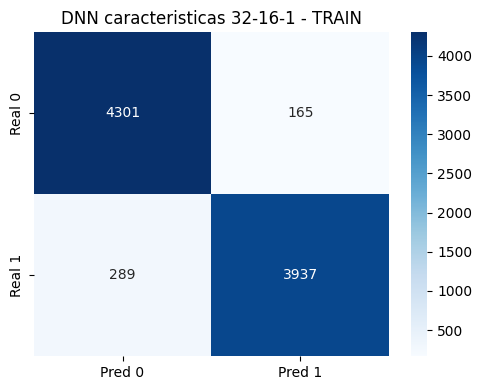


================ VALIDACIÓN ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9354    0.9687    0.9517       957
         1.0     0.9656    0.9294    0.9471       906

    accuracy                         0.9495      1863
   macro avg     0.9505    0.9490    0.9494      1863
weighted avg     0.9501    0.9495    0.9495      1863


 Matriz de confusión:
[[927  30]
 [ 64 842]]


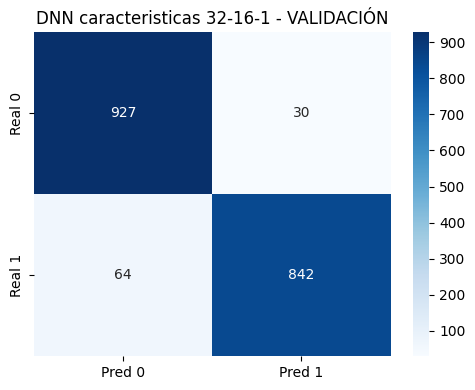


================ TEST ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9301    0.9729    0.9510       958
         1.0     0.9698    0.9227    0.9456       905

    accuracy                         0.9485      1863
   macro avg     0.9500    0.9478    0.9483      1863
weighted avg     0.9494    0.9485    0.9484      1863


 Matriz de confusión:
[[932  26]
 [ 70 835]]


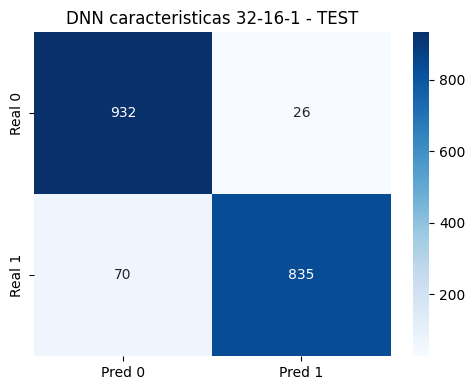


 RESUMEN HORIZONTAL (TRAIN | VAL | TEST)


,Train,Validación,Test
Loss,0.176639,0.166408,0.174899
Accuracy,0.947768,0.949544,0.948470
AUC,0.982713,0.986139,0.982004


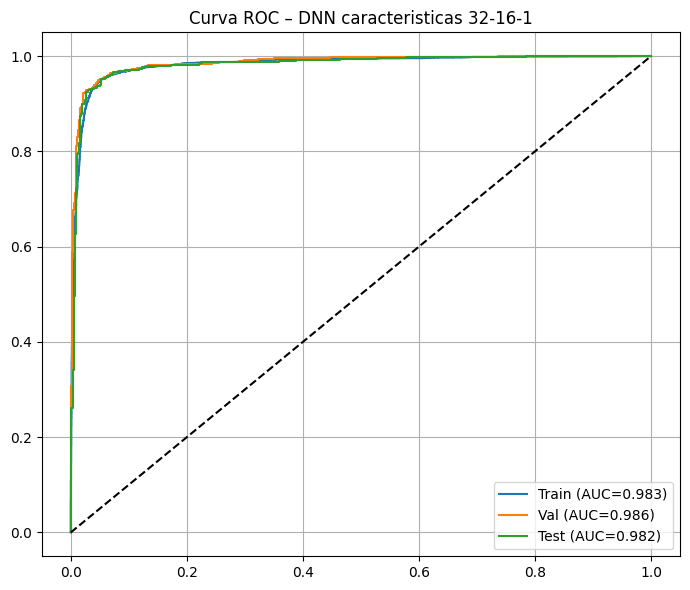

In [ ]:
resultados, tabla = evaluar_modelo_universal(
    mejor_modelo,
    X_train_pca, y_train,
    X_val_pca,   y_val,
    X_test_pca, y_test,
    nombre="DNN caracteristicas 32-16-1",
    threshold=0.5
)

Haciedno un análisis de las metricas y graficas presentadas:
En conjunto, las métricas y curvas obtenidas indican que el modelo 32–16–1 aplicado sobre el dataset de características:

-Es altamente estable y confiable.


-No presenta signos de overfitting ni underfitting.

-Aprovecha plenamente la calidad de las características extraídas del EMG.

Este está en condiciones de ser utilizado para experimentación avanzada, propuestas de aplicación real, o incluso integración futura en sistemas de clasificación EMG en tiempo real.

Este rendimiento sugiere que el flujo de preprocesamiento y el diseño del modelo son adecuados para este tipo de señal y problema.

Aparte con la matriz de confusión podemos analizar el rendimineto del modelo con respecto a las clases. Aqui entra una pregunta muy importante en nuestro proyecto.
¿Deseamos disminuir los falsos positivos o los falsos negativos?
Para esto nos basamos en nuestro objetivo el cual es predecir la contracción para el control de una prótesis. En donde nuestros dos estados: 0 (abierto o relajado) y 1 (cerrado o contraido) son ambos de gran importancoia, sin embargo, es peor que una persona quiera contraer y no contraiga o que esté relajado y por equivocación se active la protesis. Gracias a este planteaminto decidimos que nuestro objetivo es disminuir los falsos negativos (falsas relajaciones) y tomarlo como uno de nuestros principales parametros de selección para el mejor modelo. Lo que da pie al entrenamiento de diferentes modelos, en este notebook se hará el entrenamienot del mismo mejor modelo pero con el dataset sin caracteristicas. Lo cual es el siguiente paso.

**MODELO CON SEÑAL CRUDA**
Como parte de la busquda del mejor modelo y basados en la literatura vamos a realizar el entrenamiento del modelo de DNN con la señal cruda, sin ninguna caracteristica, solo haciendolo con el dataset luego del filtrado y la imputación de datos.

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AUTO 2/PROYECTO MODELOS DL/EMG_Dataset_2.csv")
df2

,Biceps_0,Biceps_1,Biceps_2,Biceps_3,Biceps_4,Biceps_5,Biceps_6,Biceps_7,Biceps_8,Biceps_9,...,Triceps_191,Triceps_192,Triceps_193,Triceps_194,Triceps_195,Triceps_196,Triceps_197,Triceps_198,Triceps_199,Target
0,-0.000018,0.000001,1.052323e-05,0.000005,-1.392463e-05,-0.000039,-6.195297e-05,-7.981792e-05,-8.983300e-05,-0.000092,...,0.000098,0.000103,9.909711e-05,0.000094,0.000088,0.000079,0.000061,0.000036,0.000012,0
1,0.000021,0.000008,-4.397314e-06,-0.000018,-3.182944e-05,-0.000045,-5.820667e-05,-6.954899e-05,-7.864873e-05,-0.000085,...,0.000006,0.000009,7.312120e-06,0.000006,0.000008,0.000009,0.000005,-0.000005,-0.000014,0
2,0.000022,0.000016,1.085406e-05,0.000006,1.050917e-06,-0.000005,-1.131269e-05,-1.703589e-05,-2.098003e-05,-0.000023,...,-0.000033,-0.000030,-2.936113e-05,-0.000027,-0.000021,-0.000015,-0.000013,-0.000017,-0.000019,0
3,-0.000004,-0.000002,2.655206e-07,0.000003,5.736278e-06,0.000008,1.025853e-05,1.316256e-05,1.606855e-05,0.000017,...,-0.000050,-0.000044,-4.176968e-05,-0.000037,-0.000028,-0.000019,-0.000015,-0.000016,-0.000018,0
4,-0.000010,-0.000008,-4.930607e-06,-0.000002,5.097237e-07,0.000001,6.445130e-07,-9.037718e-08,3.530429e-07,0.000002,...,-0.000047,-0.000040,-3.674446e-05,-0.000033,-0.000027,-0.000020,-0.000018,-0.000021,-0.000026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000082,0.000079,7.187957e-05,0.000061,4.660224e-05,0.000032,1.608324e-05,-1.475080e-06,-2.201352e-05,-0.000043,...,-0.000035,-0.000063,-8.736182e-05,-0.000107,-0.000122,-0.000131,-0.000132,-0.000126,-0.000114,1
12414,0.000050,0.000033,1.646701e-05,0.000003,-5.714887e-06,-0.000011,-1.472766e-05,-1.808956e-05,-2.200458e-05,-0.000026,...,-0.000436,-0.000512,-5.423336e-04,-0.000522,-0.000457,-0.000365,-0.000260,-0.000148,-0.000035,1
12415,0.000085,0.000087,8.822955e-05,0.000089,8.603136e-05,0.000080,7.112267e-05,6.115565e-05,5.251101e-05,0.000046,...,-0.000442,-0.000469,-4.777744e-04,-0.000461,-0.000413,-0.000338,-0.000246,-0.000153,-0.000066,1
12416,-0.000066,-0.000066,-6.378525e-05,-0.000057,-4.498078e-05,-0.000027,-4.570143e-06,1.774943e-05,3.801187e-05,0.000055,...,0.000098,0.000043,8.251435e-07,-0.000017,-0.000007,0.000017,0.000041,0.000054,0.000059,1


In [ ]:
df2.isnull().sum()

,0
Biceps_0,0
Biceps_1,0
Biceps_2,0
Biceps_3,0
Biceps_4,0
...,...
Triceps_196,0
Triceps_197,0
Triceps_198,0
Triceps_199,0


In [ ]:
X2 = df2.drop(columns=['Target'])
y2 = df2['Target']

In [ ]:
print(y2)

0        0
1        0
2        0
3        0
4        0
        ..
12413    1
12414    1
12415    1
12416    1
12417    1
Name: Target, Length: 12418, dtype: int64


In [ ]:
#Hago una división de datos 70-15-15
X_train_2, X_treintb, y_train_2, y_treintb = train_test_split(
    X2, y2, test_size=0.30, random_state=42, stratify=y2
    )
X_val2, X_test2, y_val2, y_test2 = train_test_split(
    X_treintb, y_treintb, test_size=0.50, random_state=42, stratify=y_treintb
)

In [ ]:
print("Tamaños:")
print("Train:", X_train_2.shape, y_train_2.shape)
print("Val:", X_val2.shape, y_val2.shape)
print("Test:", X_test2.shape, y_test2.shape)

Tamaños:
Train: (8692, 400) (8692,)
Val: (1863, 400) (1863,)
Test: (1863, 400) (1863,)


In [ ]:
# Normalizo este dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar SOLO con train
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_val2_scaled    = scaler.transform(X_val2)
X_test2_scaled   = scaler.transform(X_test2)


In [ ]:

#Tomo la arquitectura que mejor rendimiento tuvo y la uso para entrenar el modelo con la señal cruda
dnn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_2_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(1e-3)), #L2, # parametro para evitar overfitting, w no valores altos
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-3)),
    Dense(1, activation='sigmoid')
])

dnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name= "auc")]
)

early_stop = tf.keras.callbacks.EarlyStopping( #El early stop es para que el modelo pare cuadno no haya mas mejora
    monitor='val_loss',
    patience=5,   #Aqui es que cuando ya se cumplen 5 epocas y no hay mejoría entonces para
    restore_best_weights=True
)

history = dnn.fit( #.fit nos devuelve un objeto History el cual se guarda en la variable history, ese objeto guarda toda la información del entrenamiento por épocas, entonces es como un registro del entrenamiento.
    X_train_2_scaled, y_train_2,
    epochs=100,
    batch_size=16,
    validation_data=(X_val2_scaled, y_val2),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6939 - auc: 0.7900 - loss: 0.6468 - val_accuracy: 0.8803 - val_auc: 0.9453 - val_loss: 0.4215
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8723 - auc: 0.9300 - loss: 0.4139 - val_accuracy: 0.8991 - val_auc: 0.9549 - val_loss: 0.3613
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8982 - auc: 0.9539 - loss: 0.3504 - val_accuracy: 0.9136 - val_auc: 0.9654 - val_loss: 0.3255
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9036 - auc: 0.9595 - loss: 0.3250 - val_accuracy: 0.9200 - val_auc: 0.9711 - val_loss: 0.3087
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9209 - auc: 0.9688 - loss: 0.2891 - val_accuracy: 0.9254 - val_auc: 0.9705 - val_loss: 0.3056
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - auc: 0.9694 - loss: 0.2881 - val_accuracy: 0.9367 - val_auc: 0.9774 - val_loss: 0.2756
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3m


================ TRAIN ================

 Classification Report:
              precision    recall  f1-score   support

           0     0.9452    0.9584    0.9517      4466
           1     0.9553    0.9413    0.9483      4226

    accuracy                         0.9501      8692
   macro avg     0.9503    0.9498    0.9500      8692
weighted avg     0.9501    0.9501    0.9501      8692


 Matriz de confusión:
[[4280  186]
 [ 248 3978]]


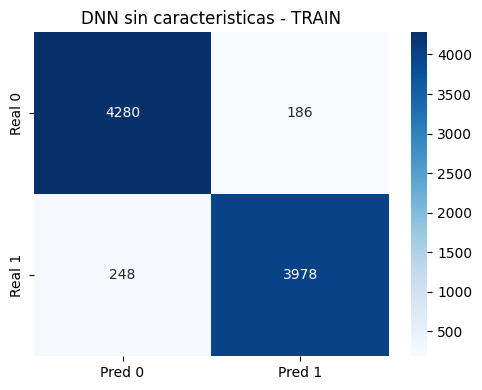


================ VALIDACIÓN ================

 Classification Report:
              precision    recall  f1-score   support

           0     0.9333    0.9655    0.9492       957
           1     0.9622    0.9272    0.9444       906

    accuracy                         0.9469      1863
   macro avg     0.9478    0.9463    0.9468      1863
weighted avg     0.9474    0.9469    0.9468      1863


 Matriz de confusión:
[[924  33]
 [ 66 840]]


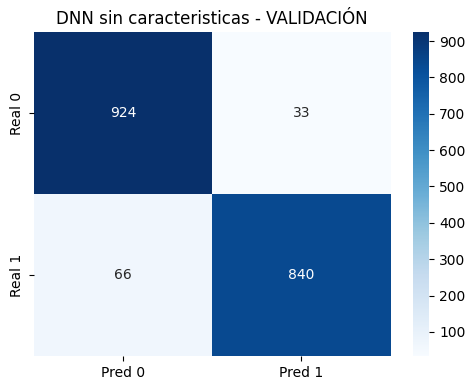


================ TEST ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9202    0.9509    0.9353       958
         1.0     0.9462    0.9127    0.9291       905

    accuracy                         0.9324      1863
   macro avg     0.9332    0.9318    0.9322      1863
weighted avg     0.9328    0.9324    0.9323      1863


 Matriz de confusión:
[[911  47]
 [ 79 826]]


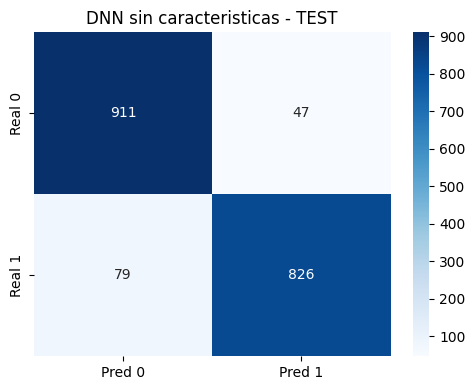


 RESUMEN HORIZONTAL (TRAIN | VAL | TEST)


,Train,Validación,Test
Loss,0.188175,0.237152,0.257899
Accuracy,0.950069,0.946860,0.932367
AUC,0.989228,0.980403,0.975475


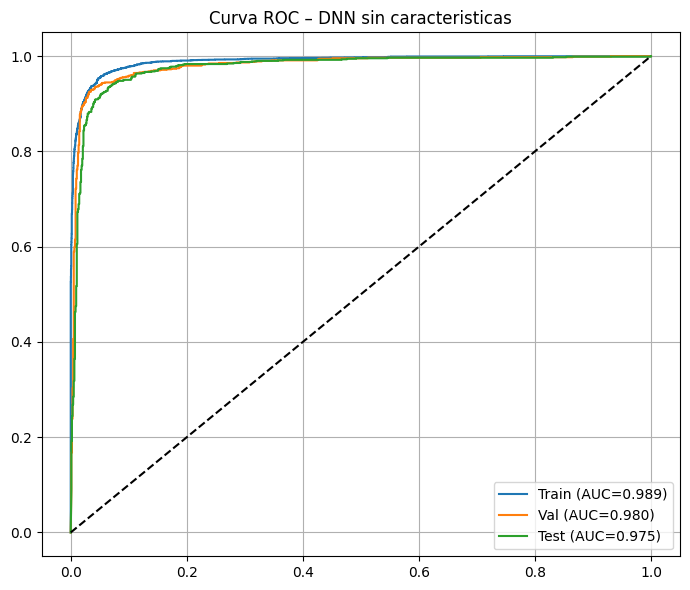

In [ ]:
resultados2, tabla2 = evaluar_modelo_universal(
    dnn,
    X_train_2_scaled, y_train_2,
    X_val2_scaled,   y_val2,
    X_test2_scaled,  y_test,
    nombre="DNN sin caracteristicas",
    threshold=0.5
)

Analisis de los resultados:
En términos globales, el modelo DNN 32–16–1 entrenado sobre datos EMG crudos muestra:
- Rendimiento notable, dadas las condiciones del dataset
•	Accuracy ≈ 94% en validación y test
•	AUC ≈ 0.98 en training, ≈ 0.976 en test
- Generalización adecuada
Aunque se observa una brecha más amplia entre train y test respecto al modelo basado en características, las diferencias son menores al 3%.
- Ligero sobreajuste, pero controlado
La diferencia en loss entre train y test sugiere un pequeño overfitting, típico en datos complejos, pero no afecta el rendimiento global.
- Buen balance de errores
La matriz de confusión muestra errores distribuidos, sin predominancia fuerte hacia falsos positivos o negativos.
- El modelo funciona bien incluso sin ingeniería de características
Esto valida la calidad del preprocesamiento y la capacidad del DNN para aprender representaciones directamente desde la señal.


Ahora finalmente, hagamos una comparación entre los dos modelos:
Si se compara con el modelo entrenado sobre características + PCA:
-El modelo de características es superior (más estable, mayor AUC, menor pérdida).
-El modelo crudo sigue siendo muy bueno y compite, especialmente considerando la ausencia de ingeniería de características manual.
Esto nos sugiere que ambos enfoques son viables, pero el pipeline basado en características optimizadas ofrece mayores garantías de generalización
